# **GROUP 5**:
Evan Garcia, Jacob Ramos, Casey Kwinn, Daniel Cook

# **Topic**:
We want to find out from students if taking a larger workload would affect their time management. 

Our goal is to examine students with different work loads during the quarter and compare how much time they allocate for different types of activities.

Question 1: What data do you have?
            We got our data from the shared responses of the survey for CS105 and CS111.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("data.csv")

## new data frame with only relevant data
df2 = df[['2. To which gender identity do you most identify?\r\n', '10. Are you currently dating/in a relationship?','20. How many units are you taking currently?',
          '27. How many times a week do you attend office hours on average?','28. On average, how many hours do you study per week? (excluding homework)',
          '29. On average, how many hours do you spend on homework per week?','56. On average, how many hours of sleep do you get per day?',
          '39. On average, how many hours do you spend on clubs and extracurricular activities per week?','55. How are you feeling this quarter?']].copy()

## clean up data and create new data columns for cleaner presentation of graphs
unit_range = []
academic_hrs_total = []

## Clean nan values to zero
df2 = df2.fillna(0)

## create list of unit range data
for i in df2['20. How many units are you taking currently?']:
  
  if i > 16:
    unit_range.append('16+ Units')
  elif i >= 12 and i < 16:
    unit_range.append('[12,16) Units')
  elif i >= 8 and i < 12:
    unit_range.append('[8,12) Units')
  else:
    unit_range.append('[0,8) Units')

## sum both columns for total academic hours data
academic_hrs_total = df2.loc[:,['28. On average, how many hours do you study per week? (excluding homework)','29. On average, how many hours do you spend on homework per week?']].sum(axis=1)

## add extra columns to df
df2['unit_range'] = unit_range
df2['academic_hrs_total'] = academic_hrs_total

## create a diplay order for graphs
order = ['[0,8) Units','[8,12) Units','[12,16) Units','16+ Units']

df2

,2. To which gender identity do you most identify?\r\n,10. Are you currently dating/in a relationship?,20. How many units are you taking currently?,27. How many times a week do you attend office hours on average?,"28. On average, how many hours do you study per week? (excluding homework)","29. On average, how many hours do you spend on homework per week?","56. On average, how many hours of sleep do you get per day?","39. On average, how many hours do you spend on clubs and extracurricular activities per week?",55. How are you feeling this quarter?,unit_range,academic_hrs_total
0,Man,Yes,20.0,0.0,7.0,7.0,7.0,5.0,5.0,16+ Units,14.0
1,Woman,Yes,13.0,0.0,6.0,6.0,7.0,2.0,5.0,"[12,16) Units",12.0
2,Man,No,12.0,0.0,7.0,4.0,7.0,2.0,2.0,"[12,16) Units",11.0
3,Woman,Yes,16.0,0.0,1.0,8.0,9.0,1.0,2.0,"[0,8) Units",9.0
4,Man,Yes,16.0,0.0,4.0,10.0,8.0,1.0,2.0,"[0,8) Units",14.0
...,...,...,...,...,...,...,...,...,...,...,...
219,Woman,No,12.0,0.0,4.0,8.0,6.0,4.0,4.0,"[12,16) Units",12.0
220,Man,No,13.0,1.0,12.0,15.0,6.0,2.0,2.0,"[12,16) Units",27.0
221,Man,Yes,13.0,0.0,10.0,10.0,6.0,5.0,5.0,"[12,16) Units",20.0
222,Woman,Yes,17.0,0.0,10.0,10.0,7.0,1.0,5.0,16+ Units,20.0


## Question 2: What would you like to know?

**Explanation:**

We would like to know:

- how many units students are taking
- how many hours of sleep students get
- how many hours are dedicated to homework
- how stressed students are
- how many hours are dedicated to extracuricalar activities

All of this corresponds to our topic of analyzing how students manage their time management during the quarter. So for this, we will extract the data we want to grab.

## Question 3: Explore the data. (Generate statistics, perform visualizations)

**Explanation**
- median of average workload(units). Median is used because it is not heavily influenced by outliers.
- Box plot of workload
- Violin graph of total academic hours
- Bar graph of average workload vs stress
- Scatter plot of sleep vs homework hours
- Bar graph of workload vs homework hours
- Pairwise Pearson's correlation of multiple columns and heatmap
- Stacked Bar graph of Workload vs Average Academic hrs vs Average Activity hrs vs Average Sleep hrs

These are just graphs that I created just to see how they look in different ways.

## Average Workload

**Explanation**

A boxplot that will show the min, max, and median of workload of students.
As shown below, the average workload/units taken is about 14.5, which makes sense because most students take around 3-4 classes and that is about 12-16 units.

Average workload: 14.5


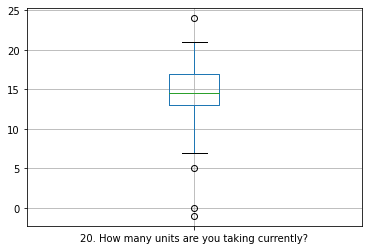

In [3]:
avg_workload = df2['20. How many units are you taking currently?'].median()
workload_box = df2.boxplot(column= ['20. How many units are you taking currently?'])
print(f'Average workload: {avg_workload}')

## Average Stress

**Explanation**

Wanted to get an idea of the range of stress students are experiencing.
The average stress according to the boxplot is about 4. We believe the reason this is the case is because of the difficulty of the classes they are in.

Average stress: 4.0


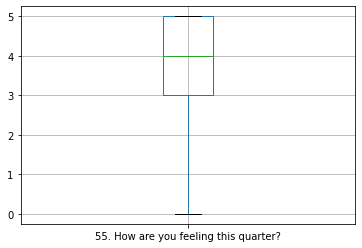

In [4]:
avg_stress = df2['55. How are you feeling this quarter?'].median()
stress_box = df2.boxplot(column= ['55. How are you feeling this quarter?'])
print(f'Average stress: {avg_stress}')

## Violin Graph (Total academic hours)

**Explanation**

A violin graph of total academic hours.
As seen below, the average academic hours is between 0-20, specifically around 10 since thats the middle. This is the combination of studying hours and homework hours. There is a small subsection between 20-40, but beyond that there is not many instances.

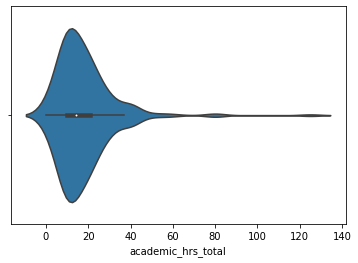

In [5]:
sns.violinplot(x = df2['academic_hrs_total'])

## Workload vs Stress

**Explanation**

Creating a pivot table to see if there is any possible correlation between increased workload and increased stress. Using median to get average becuase it is less influenced by outliers. According to the graph, most of the categories for workload are actually the same height, except for the 8-12 section. 

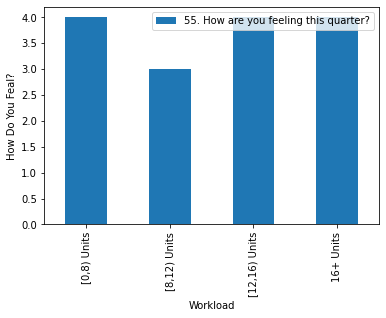

In [6]:
workload_stress= pd.pivot_table(data= df2, index= df2.unit_range, values= ['55. How are you feeling this quarter?'], aggfunc= 'median')
workload_stress.loc[order].plot(kind='bar',xlabel = 'Workload', ylabel = 'How Do You Feal?')

## Sleep vs Hw hours

**Explanation**

Generating a scatter plot based off of the average hours spent on homework vs hours of sleep. As shown below, most instances on the x-axis are around the 10 hour line on the y-axis. The only exception is the dot that has 60 hours of homework, and this is an obvious outlier compared to the rest.

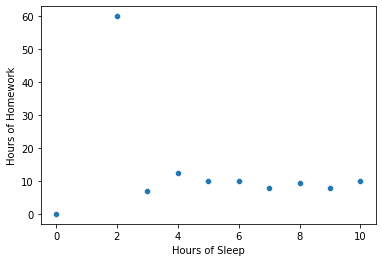

In [7]:
sleep_vs_hw = pd.pivot_table(data= df2, index=['56. On average, how many hours of sleep do you get per day?'], values= ['29. On average, how many hours do you spend on homework per week?'], aggfunc= 'median')

sns.scatterplot(data= sleep_vs_hw, x= '56. On average, how many hours of sleep do you get per day?', y= '29. On average, how many hours do you spend on homework per week?')
plt.xlabel("Hours of Sleep")
plt.ylabel("Hours of Homework")
plt.show()

## Workload vs Homework

**Explanation**

Generated a bar graph to view the possible correlation between the amount of units taken and the amount of hours put into studying/working on homework per week.
According to the graph, the workload categories are between 8-10 homework hours. 0-8 and 12-16 unit categories reach the 8 hr mark and the 8-12 and 16+ reach the 10 hr mark.

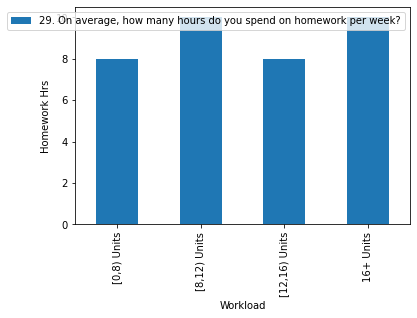

In [8]:
workload_homework = pd.pivot_table(data= df2, index=df2.unit_range, values= ['29. On average, how many hours do you spend on homework per week?'], aggfunc= 'median')
workload_homework.loc[order].plot(kind= 'bar', xlabel= 'Workload', ylabel = 'Homework Hrs')

## Pairwise Pearson's correlation of multiple columns and heatmap

**Explanation**

The Pearson's correlation is a measure of linear correlation between two sets of data. The normalized measurement of the covariance suggests a strong/weak positive/negative linear correlation with values ranging from −1 and 1.

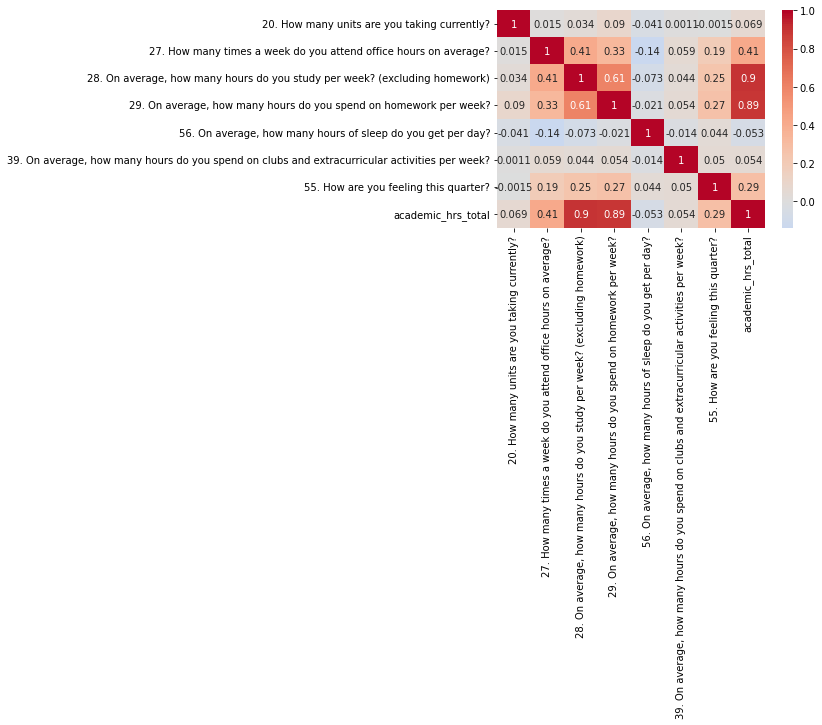

In [9]:
## perform pearsons pairwise correlation on multiple columns
df_cor = df2.corr()

## display heatmap of pearsons correlation
sns.heatmap(df_cor, center= 0, cmap = "coolwarm",annot= True)
plt.show()

##Workload vs Average Academic hrs vs Average Activity hrs vs Average Sleep hrs 

**Explanation**

I wanted to show a correlation between workload and averaged data of academic, activity, and sleep hours(I made a stacked bar graph but overall would like to be able to normalize first then display stacked bar graph)

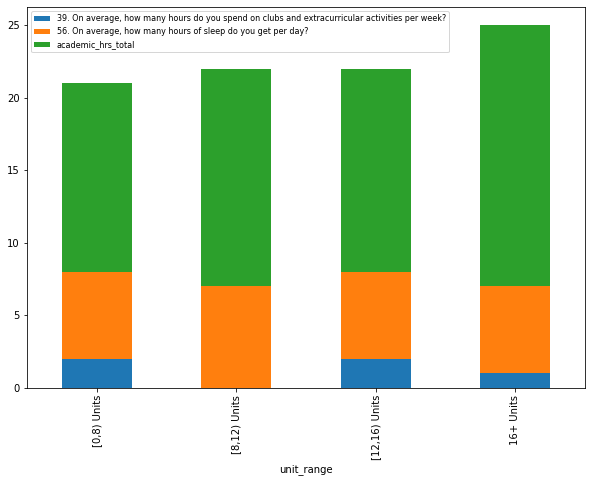

In [10]:
## create a dataframe to use for mutiple column values 
values = df2[['academic_hrs_total','39. On average, how many hours do you spend on clubs and extracurricular activities per week?' ,'56. On average, how many hours of sleep do you get per day?' ]]

## pivot table of workload vs total academic hours, activity hours, and hours of sleep
workload_vs_acad_activ_sleep = pd.pivot_table(data= df2, index= df2.unit_range, values= values, aggfunc='median')

## stacked bar graph
workload_vs_acad_activ_sleep.loc[order].plot.bar(stacked= True, figsize=(10, 7))
plt.legend(prop={'size': 8})

## Workload vs Dating/Relationship

**Explanation**

We wanted to compare the amount of units taken with the question if the student is in a relationship or not. According to the crosstab, a majority of the data takes place in the 12-16 unit range where around 80 student answered no. Around 35 students said yes in the range, which is smaller than the amount of students who said no in the 16+ unit range.

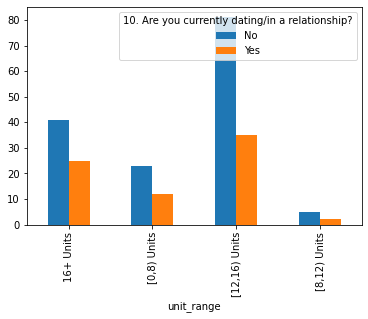

In [11]:
workload_relationship = pd.crosstab(df2['unit_range'], df2['10. Are you currently dating/in a relationship?'])

workload_relationship.plot.bar()

## Question 4: Can you state any hypothesis or make predictions? Which tests can you apply to verify your hypothesis?

**Explanation**

**Hypothesis 1:** Larger workload increases a students stress. 

We can apply the pearson correlation test to see if there is any significant correlation bewteen data.

**Hypotheses 2:** Larger workload increases time spent on studying and homework.

We can apply the pearson correlation test to see if there is any significant correlation bewteen data.

**Hypotheses 3:** Larger workload decreases time spent involved in non-academic activities.

We can apply the chi-squared test to see if we can reject the null hypothesis.

## Question 5: Test your hypothesis

## Hypothesis 1:

Correlation analysis Pearson

Our first hypothesis is that there is a correlation between Larger student workloads and student stress. 

To test our hypothesis we are using correlation analysis Pearson’s correlation coefficient. This test normalizes the two variable values and then caclulates the variance as they change.

The result will be a value between 1 and -1 with being close to 1 meaning positive correlation, close to -1 meaning negitive correlation and close to 0 meaning no correlation.

Below is our implementation:


In [12]:
## Run pearson correlation test between workload and how a student is feeling
corr_data1 = df2['20. How many units are you taking currently?'].corr(df2['55. How are you feeling this quarter?'], method= 'pearson')  
corr_data1

-0.0015414821316420465

##Hypothesis 1 Result

The result show the correlation between amount of units taken and amount of stress the student reported is very small.

The value is -0.0015

This means there is a very small, practically zero, negative correlation.

By the current data and Pearson correlation test this hypothesis is invalid.



##Hypothesis 2:

Correlation analysis Pearson

Our second hypothesis is that there is a correlation between Larger student workloads and amount of time spent studying.

To test our hypothesis we are using correlation analysis Pearson’s correlation coefficient.

This test normalizes the two variable values and then caclulates the variance as they change.

The result will be a value between 1 and -1 with being close to 1 meaning positive correlation, close to -1 meaning negitive correlation and close to 0 meaning no correlation.

Below is our implementation:


In [13]:
## Run pearson correlation test between wokload and average time spent on homework
corr_data2 = df2['20. How many units are you taking currently?'].corr(df2['29. On average, how many hours do you spend on homework per week?'], method= 'pearson')  
corr_data2

0.08998958986067608


## Hypothesis 2 Result:

The result shows the correlation between amount of units taken and amount of time spent studying is small.

The value is 0.09

This means there is a small positive correlation.

The result is not very suprizing because in general I think students spend as much time studying as they can. They only have so many hours in a day and they are not going to study more for more classes when they don't have the time.


## Hypothesis 3:

chi-squared test

Our third hypothesis is that there is a correlation between Larger student workloads time spent on clubs and extracurricular activities.

To test our hypothesis we are using chi-squared test.

This test is used to tell weather we can reject our null hypothesis.

In this case the Null hypothesis will be: There is no correlation between Larger student workloads time spent on clubs and extracurricular activities.

It relies on two results: chi value and p value. if they chi value > p value then we can reject the hypothesis.

Below is our implementation:


In [14]:
c2 = df2[['39. On average, how many hours do you spend on clubs and extracurricular activities per week?','20. How many units are you taking currently?']].copy()

bin1 = [0, 11, 15, float('inf')]
label1 = ['<11', '12-15', '16+']

c2['units'] = pd.cut(c2['20. How many units are you taking currently?'], bins=bin1, labels=label1)
value_counts = c2['units'].value_counts()

bin2 = [0, 1, 3, float('inf')]
label2 = ['0-1', '2-3', '3+']
c2['hours'] = pd.cut(c2['39. On average, how many hours do you spend on clubs and extracurricular activities per week?'], bins=bin2, labels=label2)

vals = c2['hours'].value_counts() , c2['units'].value_counts()

print(vals)

from scipy.stats import chi2_contingency

chi, p, dfree, expected = chi2_contingency(vals)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
#vals


(3+     62
2-3    49
0-1    35
Name: hours, dtype: int64, 12-15    116
16+       97
<11        9
Name: units, dtype: int64)
calculated chi square value:  33.248936578599796
calculated p value:  6.026777488181033e-08



## Hypothesis 3 Result:

The result show a chi value of 33 and a p value of .0000006

Sence our chi value is clearly alot larger then our p value we can reject our null hypothesis.

This means there is a correlation.


In [15]:
#Corelation test:
val2 = {'Units': [4,12,12,16,8],
        'Time': [3,4,4,5,2]}
test1 = pd.DataFrame(val2)
print(test1.corr(method = 'pearson'))

          Units      Time
Units  1.000000  0.807692
Time   0.807692  1.000000


In [16]:
#Corelation chi-squared test:
val3 = {'time': [50,100,150]}
in1 = ['0-1', '2-3', '3+'] 
test2 = pd.DataFrame(val3, index=in1)
val4 = {'units': [200,400,600]}
in2 = ['0-8', '9-14', '14>'] 
test3 = pd.DataFrame(val3, index=in2)
test4 = pd.concat([test2, test3], axis=1).fillna(0)
#test4
chi1, p1, dfree, expected = chi2_contingency(test4)
print("calculated chi square value: " ,chi1)
print("calculated p value: " ,p1)
#vals

calculated chi square value:  600.0
calculated p value:  2.022417284281337e-127


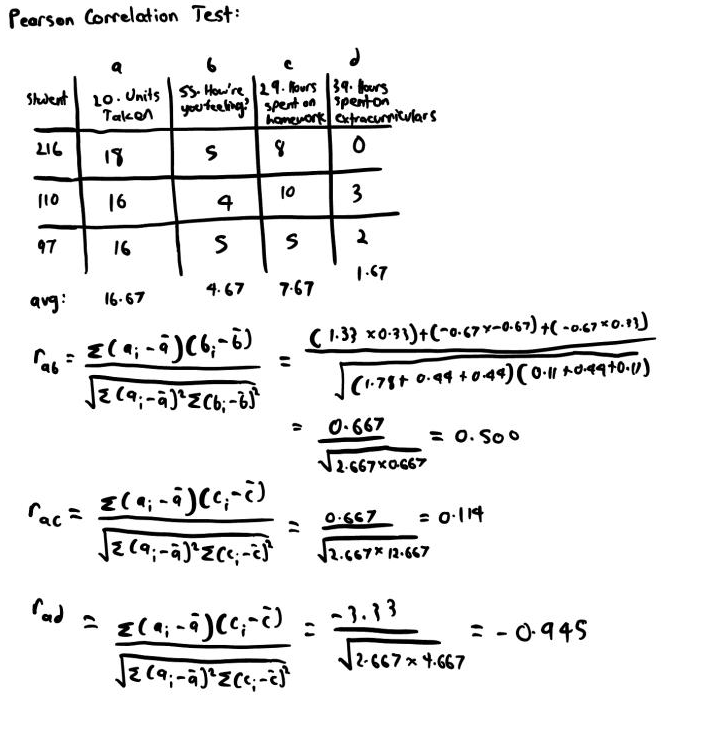

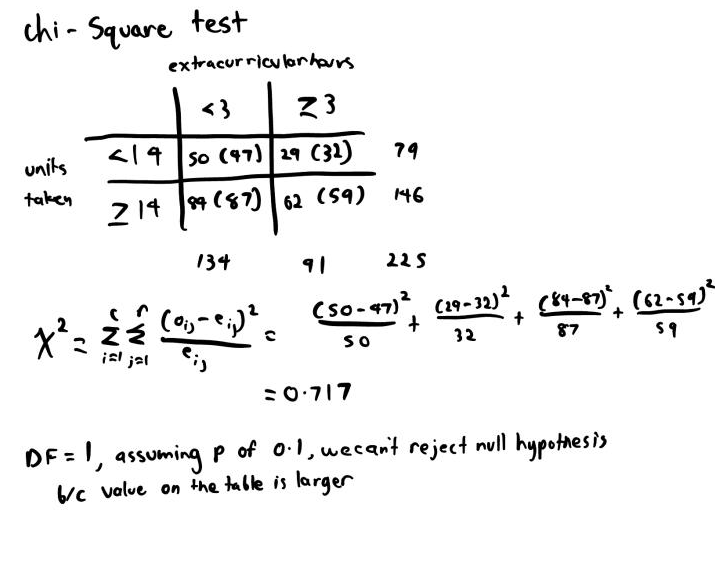